<a href="https://colab.research.google.com/github/RachapalliMounvithaLakshmi/Unified-Mentor/blob/main/Customer_satisfaction_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('/content/customer_support_tickets.csv')

# Initial exploration
print(data.info())
print(data.describe())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

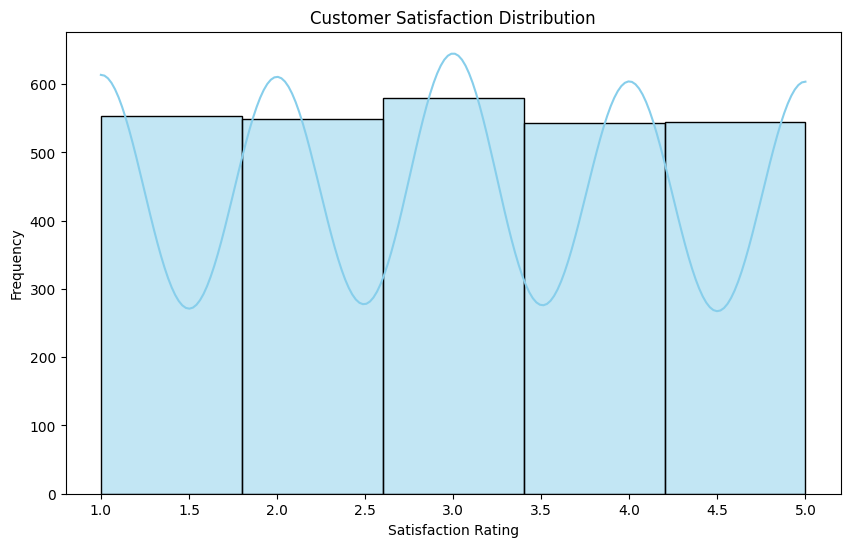

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of satisfaction ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['Customer Satisfaction Rating'], bins=5, kde=True, color='skyblue')
plt.title('Customer Satisfaction Distribution')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Frequency')
plt.show()




In [ ]:
# Top 10 common issues
common_issues = data['Ticket Subject'].value_counts().head(10)
print("Top 10 Common Issues:")
print(common_issues)

Top 10 Common Issues:
Ticket Subject
Refund request           576
Software bug             574
Product compatibility    567
Delivery problem         561
Hardware issue           547
Battery life             542
Network problem          539
Installation support     530
Product setup            529
Payment issue            526
Name: count, dtype: int64


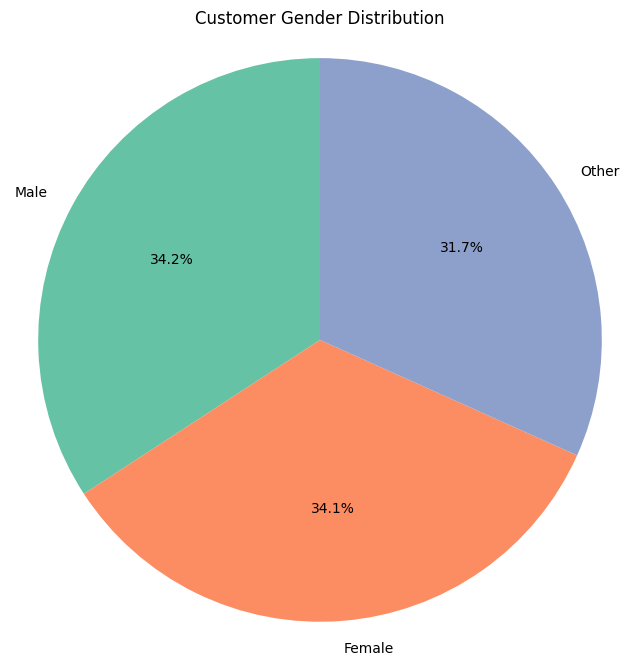

In [ ]:
# Customer Gender Distribution
plt.figure(figsize=(8, 8))
customer_gender_distribution = data['Customer Gender'].value_counts()
plt.pie(customer_gender_distribution, labels=customer_gender_distribution.index, autopct='%1.1f%%',
        colors=sns.color_palette('Set2'), startangle=90)
plt.title('Customer Gender Distribution')
plt.axis('equal')
plt.show()

In [ ]:
# Drop columns with excessive missing values and unrelated columns
drop_cols = ['Customer Name', 'Customer Email', 'Ticket Description', 'Resolution']
data = data.drop(drop_cols, axis=1)

# Handle missing values
data = data.dropna(subset=['Customer Satisfaction Rating'])  # drop rows without satisfaction rating

# Fill missing values for numerical columns with median
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    data[col] = data[col].fillna(data[col].median())

# Encode dates
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'])
data['Year'] = data['Date of Purchase'].dt.year
data['Month'] = data['Date of Purchase'].dt.month
data = data.drop('Date of Purchase', axis=1)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
# Assuming 'Customer Satisfaction Rating' is the target variable
y = data['Customer Satisfaction Rating']
X = data.drop('Customer Satisfaction Rating', axis=1)

# Select categorical columns for one-hot encoding
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standard Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred_rf = rfc.predict(X_test)

print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.1974
              precision    recall  f1-score   support

         1.0       0.22      0.25      0.24       166
         2.0       0.20      0.21      0.20       165
         3.0       0.20      0.26      0.22       174
         4.0       0.22      0.18      0.20       163
         5.0       0.13      0.09      0.10       163

    accuracy                           0.20       831
   macro avg       0.19      0.20      0.19       831
weighted avg       0.19      0.20      0.19       831

Confusion Matrix:
[[42 33 48 23 20]
 [42 34 47 22 20]
 [40 32 45 27 30]
 [30 36 45 29 23]
 [37 38 43 31 14]]


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train - 1)  # Subtract 1 to make labels 0-indexed
y_pred_xgb = xgb.predict(X_test)

print(f"XGBoost Accuracy: {accuracy_score(y_test - 1, y_pred_xgb):.4f}") # Subtract 1 from y_test for accuracy calculation
print(classification_report(y_test - 1, y_pred_xgb)) # Subtract 1 from y_test for classification report

XGBoost Accuracy: 0.2022
              precision    recall  f1-score   support

         0.0       0.21      0.21      0.21       166
         1.0       0.20      0.20      0.20       165
         2.0       0.21      0.24      0.22       174
         3.0       0.17      0.16      0.16       163
         4.0       0.22      0.20      0.21       163

    accuracy                           0.20       831
   macro avg       0.20      0.20      0.20       831
weighted avg       0.20      0.20      0.20       831



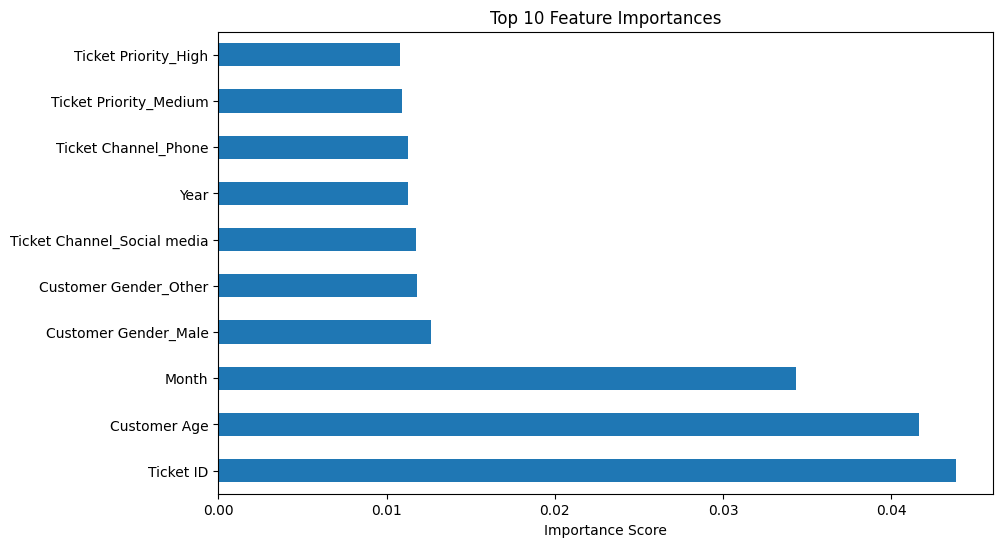

In [ ]:
importances = rfc.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_imp.head(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.show()
